<h1 align="center">Volume 4: Spectral 2.</h1>

    Marcelo Leszynski
    Section 002
    01/26/22

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample Code

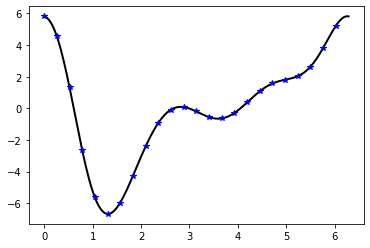

In [2]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

In [3]:
def prob1():
    # follow same steps used to calc a derivative applied on 
    # the first derivative to get a second derivative
    g_hat = fft(f)
    gp_hat = (((1j*k)**2)*g_hat)
    gp = np.real(ifft(gp_hat))
    
    # find 1/2u''-u'
    final = 0.5*gp-fp
    
    # plot results
    plt.plot(x1, final)
    plt.title('$(1/2)u\'\'-u\'$')
    plt.show()
    
    return final

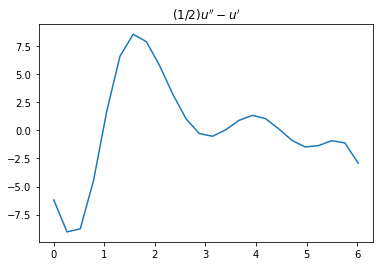

array([-6.2014624 , -9.03859559, -8.76051867, -4.48710845,  1.68502408,
        6.58177085,  8.5393636 ,  7.87570609,  5.74063932,  3.19290055,
        1.0080299 , -0.29529299, -0.5343318 ,  0.0506134 ,  0.88214202,
        1.32837907,  1.03729248,  0.12425891, -0.90717403, -1.48324565,
       -1.36309873, -0.92499526, -1.12590578, -2.92439093])

In [4]:
prob1()

# Problem 2 - setup

In [5]:
def initialize_all(a,b,y0,h):
    n = int((b-a)/h+1)
    X = np.linspace(a,b,n)
    if isinstance(y0,np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X,Y,h,int(n)

def RK4(f,X,Y,h,n):
    for i in range(n-1):
        K1 = f(X[i],Y[i])
        K2 = f(X[i]+h/2,Y[i]+h/2*K1)
        K3 = f(X[i]+h/2,Y[i]+h/2*K2)
        K4 = f(X[i+1],Y[i]+h*K3)
        Y[i+1] = Y[i] + h/6*(K1+2*K2+2*K3+K4)
    return Y

# Problem 2 
Using a fourth order Runge-Kutta method (RK4), solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

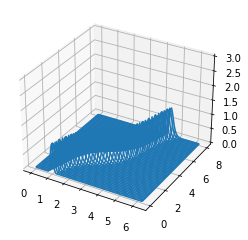

In [6]:
t_steps = 150
x_steps = 100

# initialize necessary variables
a = 0
b = 8
x_domain = np.linspace(0, 2*np.pi, x_steps)
t_domain, h = np.linspace(0, 8, t_steps, retstep=True)
y0 = np.exp((-100 * ((x_domain)-1)**2))

# prepare values for RK4 interpolation
X, Y, h, n = initialize_all(a, b, y0, h)
c = 0.2 + np.sin(x_domain - 1)**2
k = np.concatenate((np.arange(0, x_steps/2),\
                   np.array([0]),\
                   np.arange(-x_steps/2 + 1, 0, 1)))

# RK4 method. Should return a t_steps by x_steps array
f = lambda t, x: np.real(-c * ifft((1j*k)*fft(x)))
sol = RK4(f, X, Y, h, n)
X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
plt.show()